# Analysing and predicting the data of hourly vehicle counts of highway(1995)

#### Import the necessary libraries.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

## 1. Read the data as an hourly Time Series from the '.csv' file and plot the Time Series data.

In [7]:
df1 = pd.read_csv('C:/Users/91974/Downloads/Vehicle.csv')
df1.head(10)

,Hour,Vehicles
0,1,699
1,2,346
2,3,193
3,4,191
4,5,193
5,6,355
6,7,1021
7,8,3471
8,9,4826
9,10,4284


## 2. Check the basic measures of descriptive statistics of the Time Series. Also, check how many days of data do we have and plot the Time Series with the mean and median of the Time Series.

In [8]:
df1.describe()

,Hour,Vehicles
count,1689.000000,1689.000000
mean,845.000000,2060.417999
std,487.716619,1339.545842
min,1.000000,154.000000
25%,423.000000,851.000000
50%,845.000000,2262.000000
75%,1267.000000,2924.000000
max,1689.000000,5549.000000


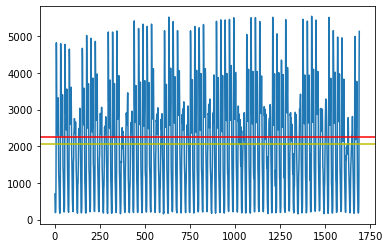

In [12]:
plt.plot(df1['Hour'],df1['Vehicles'])
plt.axhline(df1['Vehicles'].mean(),color = 'y')
plt.axhline(df1['Vehicles'].median(),color = 'r')

## 3. Decompose the Time Series to understand the various components.

In [13]:
df2 = pd.read_csv('Vehicle.csv',index_col = 'Hour')

In [14]:
df1_add_decompose = seasonal_decompose(df2, model = 'additive', period = 1)


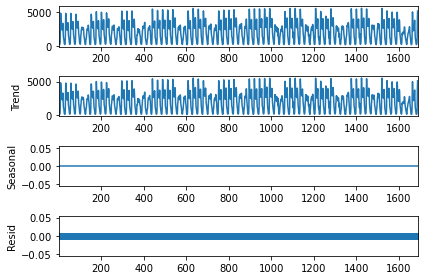

In [15]:
df1_add_decompose.plot()
plt.show()

In [16]:
df1_add_decompose = seasonal_decompose(df2, model = 'multiplicative', period = 1)

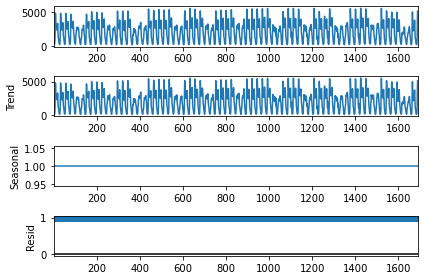

In [17]:
df1_add_decompose.plot()
plt.show()

## 4. Split the data into train and test and plot the training and test data.

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
train =df2[0:int(len(df2)*0.7)] 
test=df2[int(len(df2)*0.7):]

In [21]:
from IPython.display import display
print('Head rows of Training Data')
display(train.head())
print('Tail rows of Training Data')
display(train.tail())
print('Head rows of Test Data')
display(test.head())
print('Tail rows of Test Data')
display(test.tail())

Head rows of Training Data


,Vehicles
Hour,
1,699
2,346
3,193
4,191
5,193


Tail rows of Training Data


,Vehicles
Hour,
1178,1015
1179,559
1180,353
1181,226
1182,163


Head rows of Test Data


,Vehicles
Hour,
1183,359
1184,886
1185,1125
1186,1753
1187,2224


Tail rows of Test Data


,Vehicles
Hour,
1685,194
1686,373
1687,1218
1688,4076
1689,5137


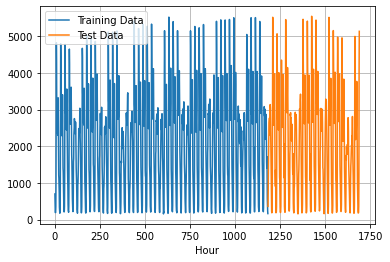

In [23]:
train['Vehicles'].plot()
test['Vehicles'].plot()
plt.grid()
plt.legend(['Training Data','Test Data'])
plt.show()

## Model 1: Build a Linear Regression using the Time Stamped order of occurence of the vehicle count.

In [24]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+256 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 21

In [25]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [26]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('Head rows of Training Data')
display(LinearRegression_train.head())
print('Tail rows of Training Data')
display(LinearRegression_train.tail())
print('Head rows of Test Data')
display(LinearRegression_test.head())
print('Tail rows of Test Data')
display(LinearRegression_test.tail())

Head rows of Training Data


,Vehicles,time
Hour,,
1,699,1
2,346,2
3,193,3
4,191,4
5,193,5


Tail rows of Training Data


,Vehicles,time
Hour,,
1178,1015,1178
1179,559,1179
1180,353,1180
1181,226,1181
1182,163,1182


Head rows of Test Data


,Vehicles,time
Hour,,
1183,359,256
1184,886,257
1185,1125,258
1186,1753,259
1187,2224,260


Tail rows of Test Data


,Vehicles,time
Hour,,
1685,194,758
1686,373,759
1687,1218,760
1688,4076,761
1689,5137,762


In [27]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Vehicles'])

LinearRegression()

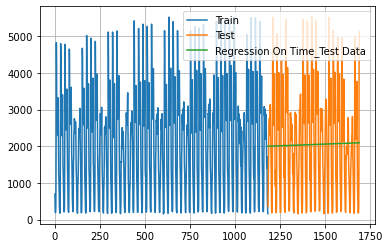

In [28]:
train_predictions_model1         = lr.predict(LinearRegression_train[['time']])
LinearRegression_train['RegOnTime'] = train_predictions_model1

test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.plot( train['Vehicles'], label='Train')
plt.plot(test['Vehicles'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')

plt.legend(loc='best')
plt.grid();

## Evaluate this model on the test data using Root Mean Squared Error (RMSE).

In [29]:
from sklearn.metrics import mean_squared_error
rmse_model1_test = mean_squared_error(test['Vehicles'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f " %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 1352.514 


## Model 2: Build a Simple Exponential Smoothing model by using the parameter 'optimise=True' within the '.fit()' function. Then,evaluate the same model on the test set using RMSE.

In [30]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [31]:
model_SES = SimpleExpSmoothing(train,initialization_method='estimated')

C:\Users\91974\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


In [32]:
model_SES_autofit = model_SES.fit(optimized=True)

C:\Users\91974\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [33]:
model_SES_autofit.params

{'smoothing_level': 0.995,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': -1197.6666666666658,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [34]:
SES_predict = model_SES_autofit.forecast(steps=len(test))
SES_predict

C:\Users\91974\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


1182    163.318201
1183    163.318201
1184    163.318201
1185    163.318201
1186    163.318201
           ...    
1684    163.318201
1685    163.318201
1686    163.318201
1687    163.318201
1688    163.318201
Length: 507, dtype: float64

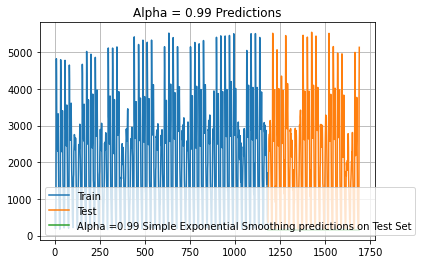

In [35]:
plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha =0.99 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='lower left')
plt.grid()
plt.title('Alpha = 0.99 Predictions');

In [36]:
def MAPE(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

In [37]:
import statsmodels.tools.eval_measures as      em
print('SES RMSE:',mean_squared_error(test.values,SES_predict.values,squared=False))
#different way to calculate RMSE
print('SES RMSE (calculated using statsmodels):',em.rmse(test.values,SES_predict.values)[0])
resultsDf = pd.DataFrame({'Test RMSE': [em.rmse(test.values,SES_predict.values)[0]]},index=['Alpha=0.99,SES'])
print(resultsDf)

SES RMSE: 2322.773949796665
SES RMSE (calculated using statsmodels): 2322.773949796665
                 Test RMSE
Alpha=0.99,SES  2322.77395


## Model 3: Build a Double Exponential Smoothing model by using the parameter 'optimise=True' within the '.fit()' function. Then,evaluate the same model on the test set using RMSE.

C:\Users\91974\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\91974\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\91974\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'



==Holt model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.995, 'smoothing_trend': 0.995, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': -1197.6666666666658, 'initial_trend': 501.01212121212114, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
DES RMSE: 20198.794201121087
                            Test RMSE
Alpha=0.99,SES            2322.773950
Alpha=1,Beta=0.0189:DES  20198.794201


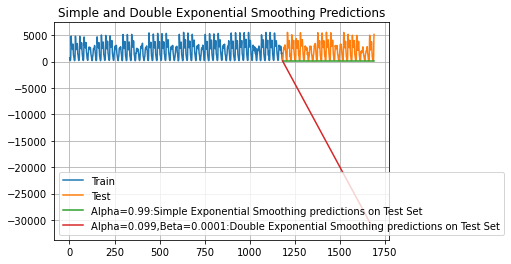

In [38]:
model_DES = Holt(train,initialization_method='estimated')
# Fitting the model
model_DES = model_DES.fit(optimized = True)

print('')
print('==Holt model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_DES.params)
DES_predict =  model_DES.forecast(len(test))
DES_predict
plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=0.99:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.099,Beta=0.0001:Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions')
print('DES RMSE:',mean_squared_error(test.values,DES_predict.values,squared=False))
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,DES_predict.values,squared=False)]}
                           ,index=['Alpha=1,Beta=0.0189:DES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
print(resultsDf)


## Model 4: Build a Triple Exponential Smoothing model by using the parameter 'optimise=True' within the '.fit()' function. Then,evaluate the same model on the test set using RMSE.


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.995, 'smoothing_trend': nan, 'smoothing_seasonal': 0.0050000000000000044, 'damping_trend': nan, 'initial_level': 350.1222222222218, 'initial_trend': nan, 'initial_seasons': array([ -16.39583333,  298.89583333,  376.125     ,  -31.3125    ,
       -324.8125    , -302.5       ]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
TES RMSE: 2089.7036652358584


C:\Users\91974\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\91974\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:920: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
C:\Users\91974\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


,Test RMSE
"Alpha=0.99,SES",2322.773950
"Alpha=1,Beta=0.0189:DES",20198.794201
"Alpha=0.25,Beta=0.0,Gamma=0.74:TES",2089.703665


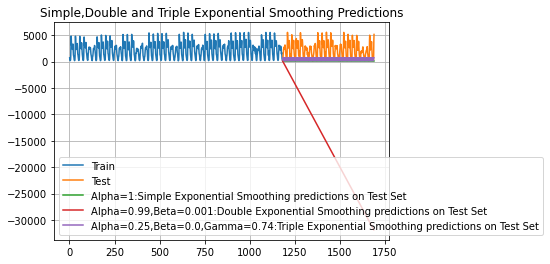

In [39]:
# Initializing the Double Exponential Smoothing Model
model_TES = ExponentialSmoothing(train,seasonal='additive',initialization_method='estimated',seasonal_periods=6)
# Fitting the model
model_TES = model_TES.fit(optimized = 'True')

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES.params)
TES_predict =  model_TES.forecast(len(test))
TES_predict
plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=1:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.99,Beta=0.001:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Alpha=0.25,Beta=0.0,Gamma=0.74:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions')
print('TES RMSE:',mean_squared_error(test.values,TES_predict.values,squared=False))
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,TES_predict.values,squared=False)]}
                           ,index=['Alpha=0.25,Beta=0.0,Gamma=0.74:TES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

## Which model performs the best?

Tweak the different parameters for each of these models and try to come up with a better accuracy (less RMSE)

##### Note: You can go ahead and attempt the following questions now or wait until after the mentored learning session. During the mentor learning sessions, you will get clarity on how to solve the following questions.

## Model 5: Build a Simple Exponential Smoothing model by taking the best alpha [in the range of 0.01 to 1 taking an interval of 0.01] in terms of the least RMSE. Then,evaluate the same model on the test data. Also, do make sure that 'optimized = False' within the '.fit()' command.

In [40]:
model_SES = SimpleExpSmoothing(train,initialization_method='estimated')
model_SES_autofit = model_SES.fit(smoothing_level=0.5,optimized=False)
model_SES_autofit.params
SES_predict = model_SES_autofit.forecast(steps=len(test))
SES_predict

C:\Users\91974\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\91974\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


1182    301.794613
1183    301.794613
1184    301.794613
1185    301.794613
1186    301.794613
           ...    
1684    301.794613
1685    301.794613
1686    301.794613
1687    301.794613
1688    301.794613
Length: 507, dtype: float64

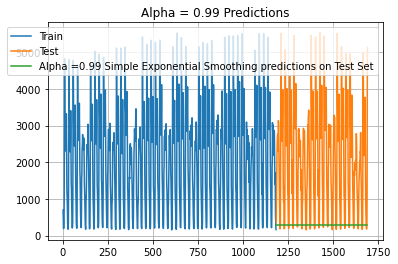

In [41]:
plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha =0.99 Simple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.99 Predictions');

## Model 6: Build a Double Exponential Smoothing model by taking the best alpha and beta [both in the range of 0.01 to 1 taking an interval of 0.01] in terms of the least RMSE. Then,evaluate the same model on the test data. Also, do make sure that 'optimized = False' within the '.fit()' command.


==Holt model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.5, 'smoothing_trend': 0.25, 'smoothing_seasonal': None, 'damping_trend': nan, 'initial_level': -1197.6666666666658, 'initial_trend': 501.01212121212114, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
DES RMSE: 72667.31938760192
                                       Test RMSE
Alpha=0.99,SES                       2322.773950
Alpha=1,Beta=0.0189:DES             20198.794201
Alpha=0.25,Beta=0.0,Gamma=0.74:TES   2089.703665
Alpha=1,Beta=0.0189:DES             72667.319388


C:\Users\91974\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\91974\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


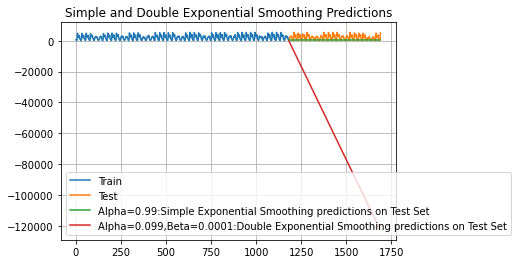

In [42]:
model_DES = Holt(train,initialization_method='estimated')
# Fitting the model
model_DES = model_DES.fit(smoothing_level=0.5,smoothing_trend=0.25,optimized = False)

print('')
print('==Holt model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_DES.params)
DES_predict =  model_DES.forecast(len(test))
DES_predict
plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=0.99:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.099,Beta=0.0001:Double Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions')
print('DES RMSE:',mean_squared_error(test.values,DES_predict.values,squared=False))
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,DES_predict.values,squared=False)]}
                           ,index=['Alpha=1,Beta=0.0189:DES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
print(resultsDf)


## Model 7: Build a Triple Exponential Smoothing model by taking the best alpha, beta and gamma [all in the range of 0.1 to 1 taking an interval of 0.1] in terms of the least RMSE. Then,evaluate the same model on the test data. Also, do make sure that 'optimized = False' within the '.fit()' command.


==Holt Winters model Exponential Smoothing Estimated Parameters ==

{'smoothing_level': 0.5, 'smoothing_trend': 0.5, 'smoothing_seasonal': 0.5, 'damping_trend': nan, 'initial_level': 350.1222222222218, 'initial_trend': nan, 'initial_seasons': array([ -16.39583333,  298.89583333,  376.125     ,  -31.3125    ,
       -324.8125    , -302.5       ]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
TES RMSE: 2191.9154462289125


C:\Users\91974\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
C:\Users\91974\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


,Test RMSE
"Alpha=0.99,SES",2322.773950
"Alpha=1,Beta=0.0189:DES",20198.794201
"Alpha=0.25,Beta=0.0,Gamma=0.74:TES",2089.703665
"Alpha=1,Beta=0.0189:DES",72667.319388
"Alpha=0.25,Beta=0.0,Gamma=0.74:TES",2191.915446


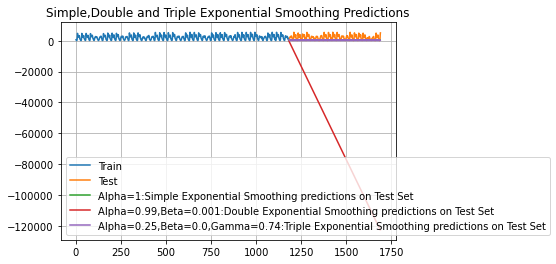

In [43]:
# Initializing the Double Exponential Smoothing Model
model_TES = ExponentialSmoothing(train,seasonal='additive',initialization_method='estimated',seasonal_periods=6)
# Fitting the model
model_TES = model_TES.fit(smoothing_level=0.5,smoothing_trend=0.5,smoothing_seasonal=0.5,optimized = False)

print('')
print('==Holt Winters model Exponential Smoothing Estimated Parameters ==')
print('')
print(model_TES.params)
TES_predict =  model_TES.forecast(len(test))
TES_predict
plt.plot(train, label='Train')
plt.plot(test, label='Test')

plt.plot(SES_predict, label='Alpha=1:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.99,Beta=0.001:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Alpha=0.25,Beta=0.0,Gamma=0.74:Triple Exponential Smoothing predictions on Test Set')

plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions')
print('TES RMSE:',mean_squared_error(test.values,TES_predict.values,squared=False))
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,TES_predict.values,squared=False)]}
                           ,index=['Alpha=0.25,Beta=0.0,Gamma=0.74:TES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

## Which model performs the best?

Triple Exponential Smoothing predictions on test set has less RMSE.